In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2_contingency
%matplotlib inline

In [3]:
df = pd.read_stata('data.dta') 
df.loc[(df['degree']==1) | (df['degree']==3) | (df['degree']==4),'background'] = 'Medical'
df.loc[(df['degree']==6),'background'] = 'Biochemistry'

In [4]:
df_med = df[(df['degree']==1) | (df['degree']==3) | (df['degree']==4)]
df_bio = df[df['degree']==6]

# Abilities related to mental health of students

In [5]:
def gen_grouped_bar(data, columns, title=' ', xlab=' ', legend=' ', legend_name=[]):
    value_counts = data[columns].apply(pd.value_counts)
    percentages = (value_counts / value_counts.sum()) * 100

    ax = percentages.plot(kind='bar', legend=True, figsize=(10, 5), width=.8)
    plt.ylabel('Percentage')
    plt.xlabel(xlab)
    plt.title(title)
    plt.xticks(rotation=0)
    plt.legend(title=legend, loc='upper center', labels=legend_name, bbox_to_anchor=(1.14, 1))
    plt.show()

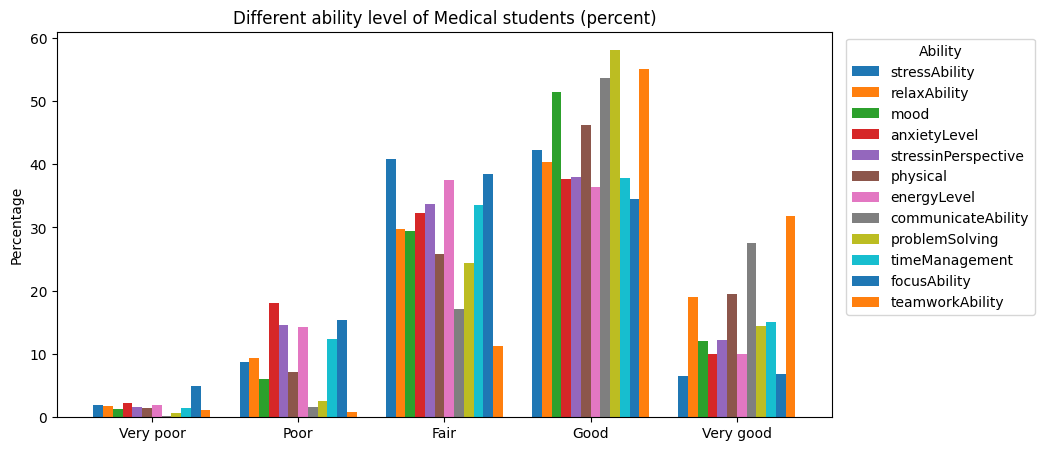

In [6]:
gen_grouped_bar(
    df_med, df.columns[2:14], 
    title='Different ability level of Medical students (percent)', 
    legend='Ability',
    legend_name = df.columns[2:14])

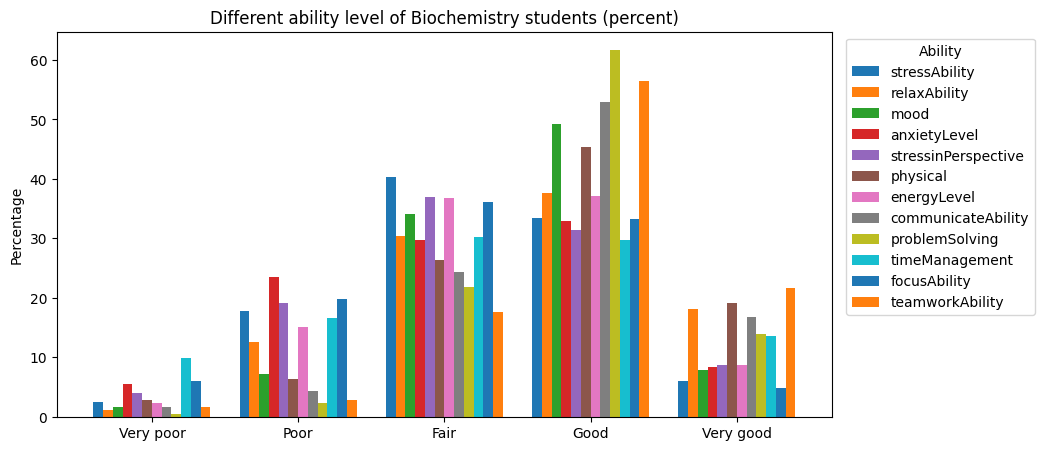

In [7]:
gen_grouped_bar(
    df_bio, df.columns[2:14], 
    title='Different ability level of Biochemistry students (percent)', 
    legend='Ability',
    legend_name = df.columns[2:14])

# Activities of students in leisure time

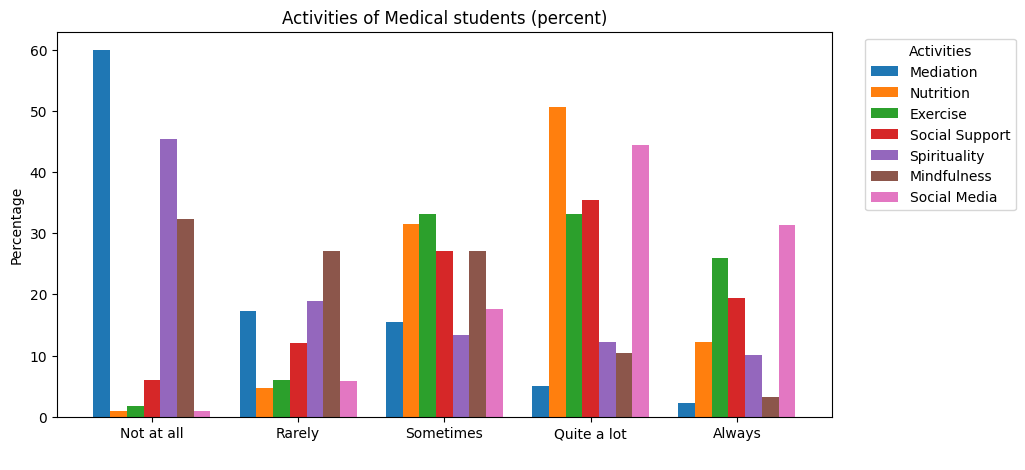

In [8]:
legend_names = ['Mediation', 'Nutrition', 'Exercise', 'Social Support', 
                'Spirituality', 'Mindfulness', 'Social Media']
gen_grouped_bar(
    df_med, df.columns[14:21], 
    title='Activities of Medical students (percent)', 
    legend='Activities',
    legend_name = legend_names)

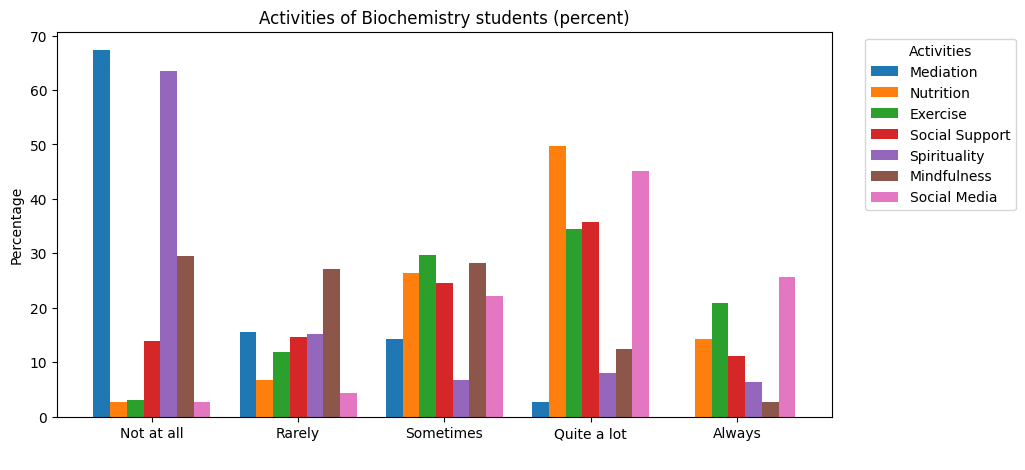

In [9]:
gen_grouped_bar(
    df_bio, df.columns[14:21], 
    title='Activities of Biochemistry students (percent)', 
    legend='Activities',
    legend_name = legend_names)

# Most effective stress relieving activities according to students

In [10]:
c_names = ['Mediation', 'Nutrition', 'Exercise', 'Social Support', 
           'Spirituality', 'Mindfulness', 'Social Media']
df_mr = df_med[df.columns[22:29]]
df_dummies = pd.get_dummies(df_mr, columns=df.columns[22:29])
df_dummies.columns = c_names
response_counts = df_dummies.sum()
percentage = response_counts/np.shape(df_med)[0] * 100
percentage.round(3)

Mediation          3.026
Nutrition          0.908
Exercise          35.703
Social Support    26.172
Spirituality       6.203
Mindfulness        2.874
Social Media       2.874
dtype: float64

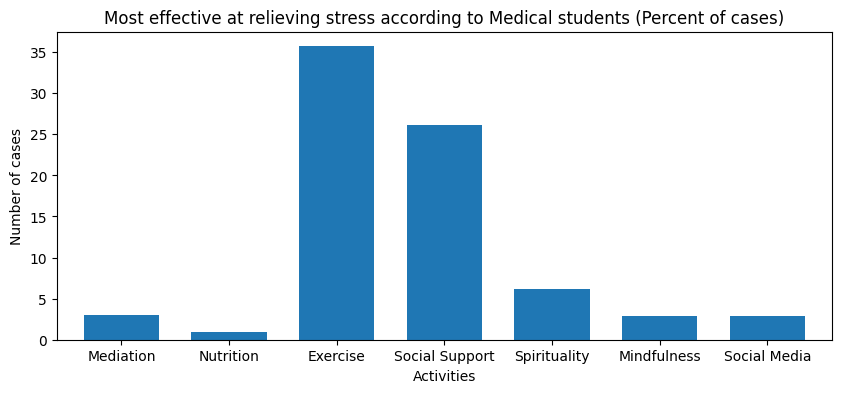

In [11]:
percentage.plot(kind='bar', figsize=(10, 4), width=.7)
plt.xticks(rotation=0)
plt.xlabel('Activities')
plt.ylabel('Number of cases')
plt.title('Most effective at relieving stress according to Medical students (Percent of cases)')
plt.show()

Most of the Medical students thinks that 'Exercise' (35.70%) and 'Social Support Activities' (26.17%) are effective on stress relieve.

In [12]:
df_mr = df_bio[df.columns[22:29]]
df_dummies = pd.get_dummies(df_mr, columns=df.columns[22:29])
df_dummies.columns = c_names
response_counts = df_dummies.sum()
percentage = response_counts/np.shape(df_bio)[0] * 100
percentage.round(3)

Mediation          0.787
Nutrition          3.150
Exercise          33.465
Social Support    13.780
Spirituality       4.331
Mindfulness        0.787
Social Media       3.543
dtype: float64

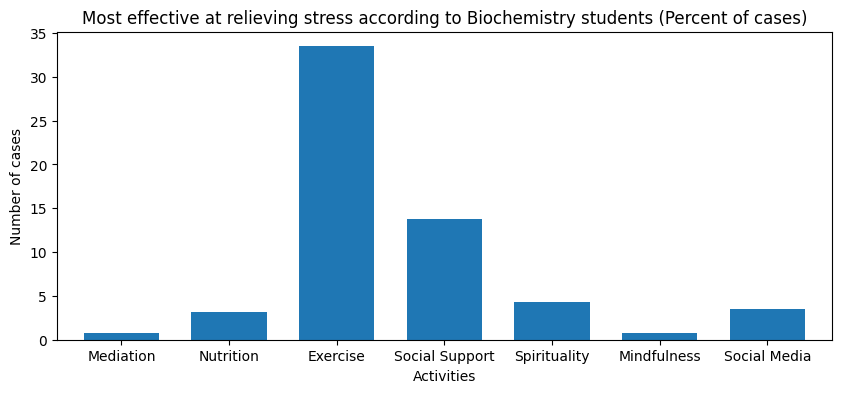

In [13]:
percentage.plot(kind='bar', figsize=(10, 4), width=.7)
plt.xticks(rotation=0)
plt.xlabel('Activities')
plt.ylabel('Number of cases')
plt.title('Most effective at relieving stress according to Biochemistry students (Percent of cases)')
plt.show()

Most of the Medical students thinks that 'Exercise' (33.46%) and 'Social Support Activities' (13.78%) are effective on stress relieve.

### Comparison: (Social Media)

Only 2.87% of Medical students and 3.54% Biochemistry students thinks that 'Social Media' effective on stress relieve. This number is quite small than 'Exercise' and 'Social Support Activities' in both of the groups.

# Analysing students stress score

## By degree

In [14]:
df['stressScore'].describe().round(2)

count    876.00
mean      25.96
std        4.34
min       12.00
25%       23.00
50%       26.00
75%       29.00
max       37.00
Name: stressScore, dtype: float64

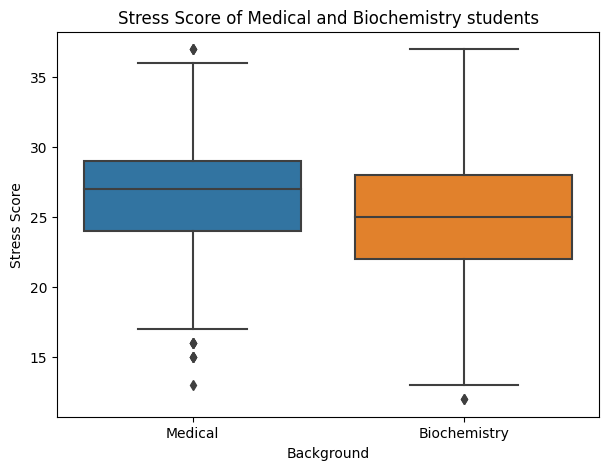

In [15]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='background', y='stressScore')
plt.xlabel('Background')
plt.ylabel('Stress Score')
plt.title('Stress Score of Medical and Biochemistry students')
plt.show()


We suspect a difference of score in the graph between tow cohort. We will do a two independent samples t-test to clarify the doubt.

## Hypothesis testing of mean difference of score between Medical and Biochemistry students

$H_0: \mu_{Med} = \mu_{Bio} \\$
$H_1: \mu_{Med} \neq \mu_{Bio}$


In [16]:
med_score = df.loc[df["background"]=="Medical", 'stressScore']
med_score = med_score[~np.isnan(med_score)]
med_score.describe().round(2)

count    647.00
mean      26.44
std        4.14
min       13.00
25%       24.00
50%       27.00
75%       29.00
max       37.00
Name: stressScore, dtype: float64

In [17]:
bio_score = df.loc[df["background"]=="Biochemistry", 'stressScore']
bio_score = bio_score[~np.isnan(bio_score)]
bio_score.describe().round(2)

count    229.00
mean      24.62
std        4.60
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       37.00
Name: stressScore, dtype: float64

In [18]:
t_statistic, p_value = stats.ttest_ind(med_score, bio_score)

print("t-Statistic:", t_statistic.round(3))
print("P-Value:", p_value.round(11))

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the samples.")


t-Statistic: 5.565
P-Value: 3.496e-08
Reject the null hypothesis: There is a significant difference between the samples.


So, it is now clear that Medical students have significantly higher score and Biochemistry students have less.

## By year

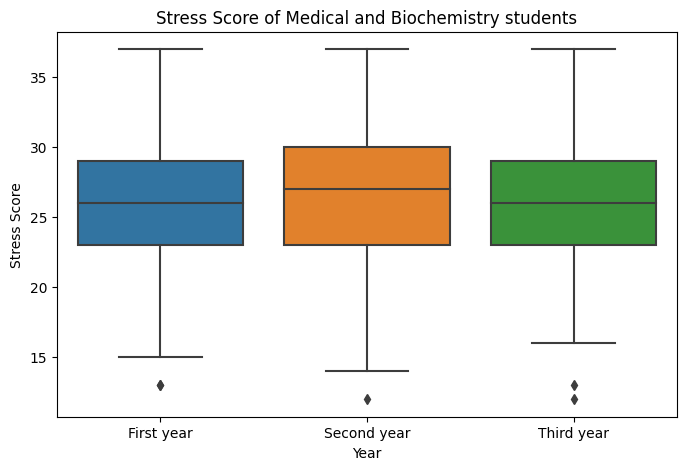

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='year', y='stressScore')
plt.xlabel('Year')
plt.ylabel('Stress Score')
plt.title('Stress Score of Medical and Biochemistry students')
plt.show()


Mean stress score of different year student may equal. We can predict this by the graph shown above. Let's check if the prediction is right. 

## Are mean stress scores of different year student same?

$H_0: \mu_{1} = \mu_{2} = \mu_{3} \\$
$H_1: \mu_i \neq \mu_j$ ; at least for one $ i \neq j$

In [20]:
formula = 'stressScore ~ year'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
year,18.665372,2.0,0.494706,0.609921
Residual,16469.237596,873.0,NaN,NaN


Here, p-value>.05. So we may not reject the $H_0$. So, means of score are equal in each year of students.

## Relation between stress score and social media usage

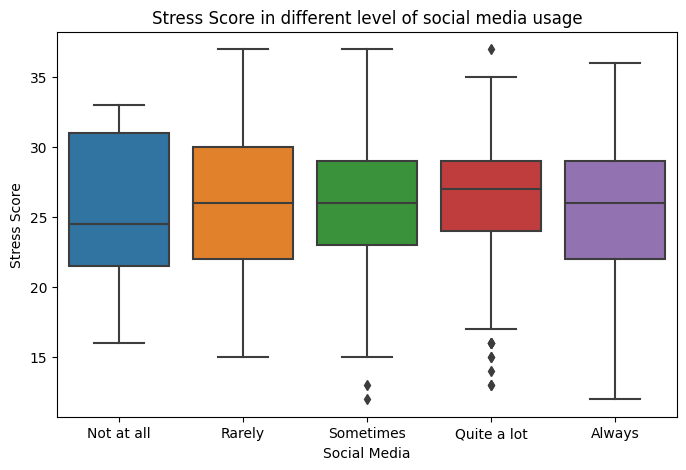

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='socialMedia', y='stressScore')
plt.xlabel('Social Media')
plt.ylabel('Stress Score')
plt.title('Stress Score in different level of social media usage')
plt.show()

$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5  \\$
$H_1: \mu_i \neq \mu_j$ ; at least for one $ i \neq j$


In [22]:
formula = 'stressScore ~ socialMedia'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
socialMedia,70.073632,4.0,0.929572,0.446003
Residual,16376.896620,869.0,NaN,NaN


Here, p-value>.05. So we may not reject the $H_0$. So, means of score are equal in each level of social media usage. So, it is unnessecary to check individual groups. (eg: Medical, Biochemistry)

# Last month mental condition

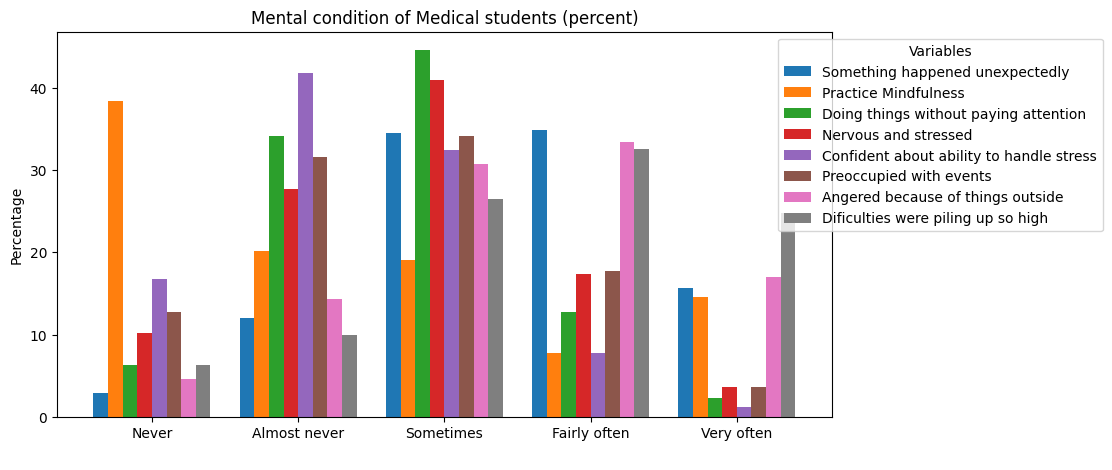

In [23]:
legend_names = ['Something happened unexpectedly', 'Practice Mindfulness',
       'Doing things without paying attention', 'Nervous and stressed',
       'Confident about ability to handle stress', 'Preoccupied with events',
       'Angered because of things outside', 'Dificulties were piling up so high']

gen_grouped_bar(
    df_med, df.columns[97:105], 
    title='Mental condition of Medical students (percent)', 
    legend='Variables',
    legend_name = legend_names)

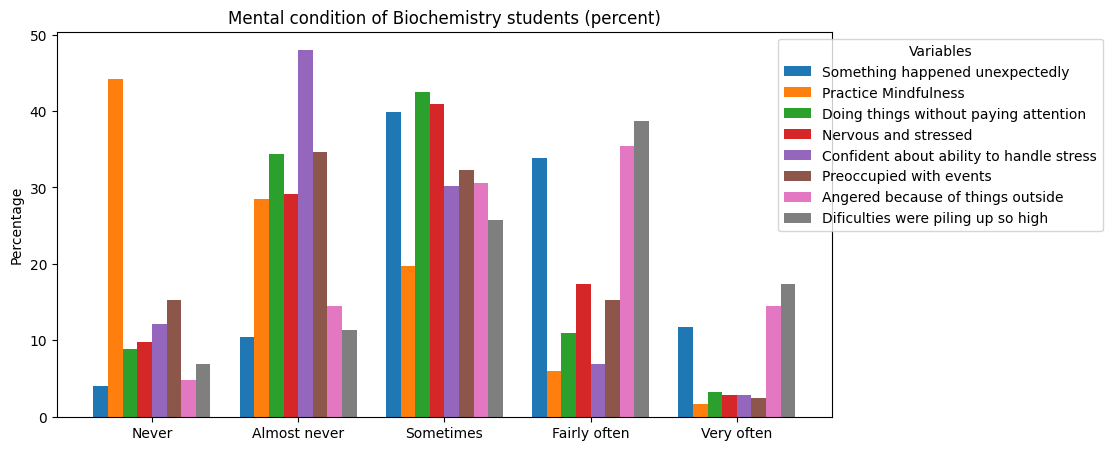

In [24]:
legend_names = ['Something happened unexpectedly', 'Practice Mindfulness',
       'Doing things without paying attention', 'Nervous and stressed',
       'Confident about ability to handle stress', 'Preoccupied with events',
       'Angered because of things outside', 'Dificulties were piling up so high']

gen_grouped_bar(
    df_bio, df.columns[97:105], 
    title='Mental condition of Biochemistry students (percent)', 
    legend='Variables',
    legend_name = legend_names)

# Relationship between Social Media and Stress of Medical students

In [25]:
columns_to_analyze = [
    'something_happened_unexpectedly', 'practice_Mindfulness',
    'doing_things_without_paying_atte', 'nervous_and_stressed',
    'confident_about_ability_to_handl', 'preoccupied_with_events',
    'angered_because_of_things_outsid', 'dificulties_were_piling_up_so_hi'
]
c_names = ['Something happened unexpectedly', 'Practice Mindfulness',
       'Doing things without paying attention', 'Nervous and stressed',
       'Confident about ability to handle stress', 'Preoccupied with events',
       'Angered because of things outside', 'Dificulties were piling up so high']
stat = {'ChiSQ': [], "p-value": []}

for column in columns_to_analyze:
    contingency_table = pd.crosstab(df_med['socialMedia'], df_med[column])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)

    stat['ChiSQ'].append(chi2)
    stat['p-value'].append(p)
  

stat = pd.DataFrame(stat, index=c_names)
stat['alpha=5%'] = stat['p-value']<0.05
stat['alpha=10%'] = stat['p-value']<0.1

stat

,ChiSQ,p-value,alpha=5%,alpha=10%
Something happened unexpectedly,20.083040,0.216504,False,False
Practice Mindfulness,14.099832,0.591277,False,False
Doing things without paying attention,32.249270,0.009278,True,True
Nervous and stressed,42.368355,0.000348,True,True
Confident about ability to handle stress,25.103563,0.068020,False,True
Preoccupied with events,25.118775,0.067759,False,True
Angered because of things outside,25.453792,0.062215,False,True
Dificulties were piling up so high,19.495242,0.243819,False,False


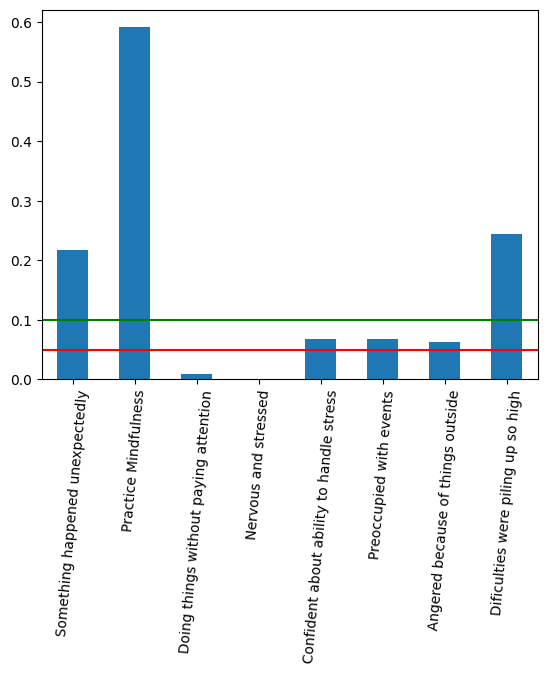

In [26]:
stat['p-value'].plot(kind='bar')
plt.axhline(y=.05, color='r', label='Horizontal Line at y=15')
plt.axhline(y=.1, color='g', label='Horizontal Line at y=15')
plt.xticks(rotation=85)
plt.show()


## Heatmap plot for significant pairs (Percent of cases)

From the plot above we can see 'Social Media' usage of Medical students is associated with 'Doing things without paying attention' and 'Nervous and stressed'. Let's visualise the association with the help of heatmap plot. 

In [27]:
def gen_heatmap(data, factor1, factor2):
    columns_to_analyze = [
        'something_happened_unexpectedly', 'practice_Mindfulness',
        'doing_things_without_paying_atte', 'nervous_and_stressed',
        'confident_about_ability_to_handl', 'preoccupied_with_events',
        'angered_because_of_things_outsid', 'dificulties_were_piling_up_so_hi']
    c_names = [
        'Something happened unexpectedly', 'Practice Mindfulness',
        'Doing things without paying attention', 'Nervous and stressed',
        'Confident about ability to handle stress', 'Preoccupied with events',
        'Angered because of things outside', 'Dificulties were piling up so high']
    pivot_table = pd.crosstab(data[factor1], data[factor2])
    total_count = pivot_table.values.sum()
    overall_percentage = (pivot_table / total_count * 100).round(2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(overall_percentage, annot=True, cmap='BuPu')
    plt.xlabel(c_names[columns_to_analyze.index(factor2)])
    plt.ylabel(factor1)
    plt.show()

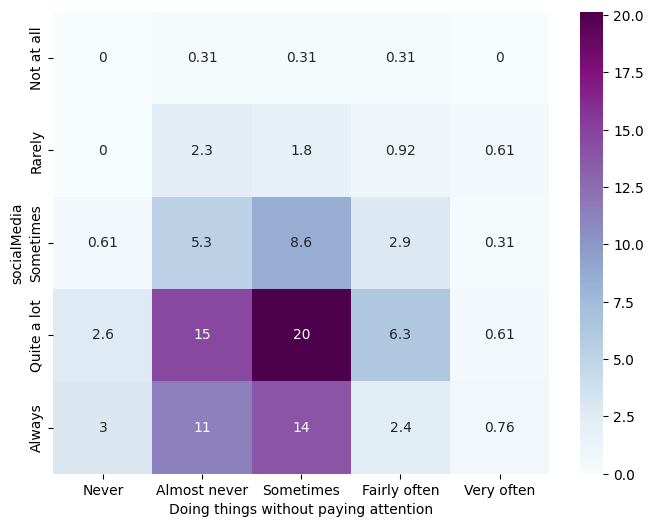

In [28]:
gen_heatmap(df_med, 'socialMedia', 'doing_things_without_paying_atte')

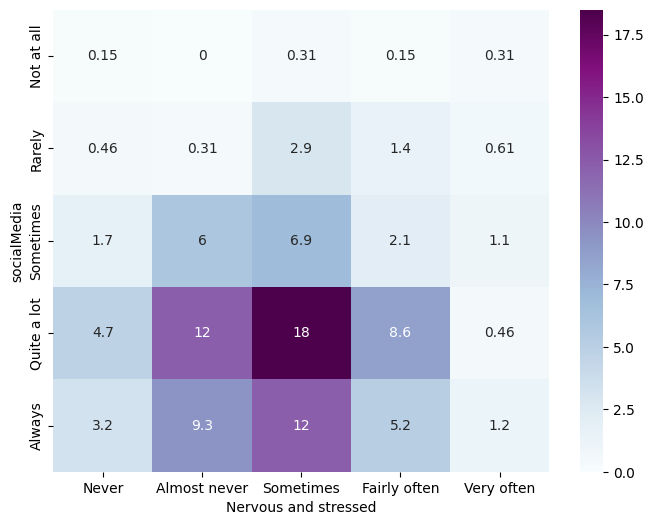

In [29]:
gen_heatmap(df_med, 'socialMedia', 'nervous_and_stressed')

# Relationship between Social Media and Stress of Biochemistry students

In [30]:
stat = {'ChiSQ': [], "p-value": []}

for column in columns_to_analyze:
    contingency_table = pd.crosstab(df_bio['socialMedia'], df_bio[column])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)

    stat['ChiSQ'].append(chi2)
    stat['p-value'].append(p)
  

stat = pd.DataFrame(stat, index=c_names)
stat['alpha=5%'] = stat['p-value']<0.05
stat['alpha=10%'] = stat['p-value']<0.1

stat

,ChiSQ,p-value,alpha=5%,alpha=10%
Something happened unexpectedly,15.203546,0.509784,False,False
Practice Mindfulness,13.593694,0.628954,False,False
Doing things without paying attention,14.727804,0.544658,False,False
Nervous and stressed,15.874324,0.461766,False,False
Confident about ability to handle stress,32.783452,0.007894,True,True
Preoccupied with events,15.138349,0.514530,False,False
Angered because of things outside,24.910255,0.071423,False,True
Dificulties were piling up so high,13.243192,0.654900,False,False


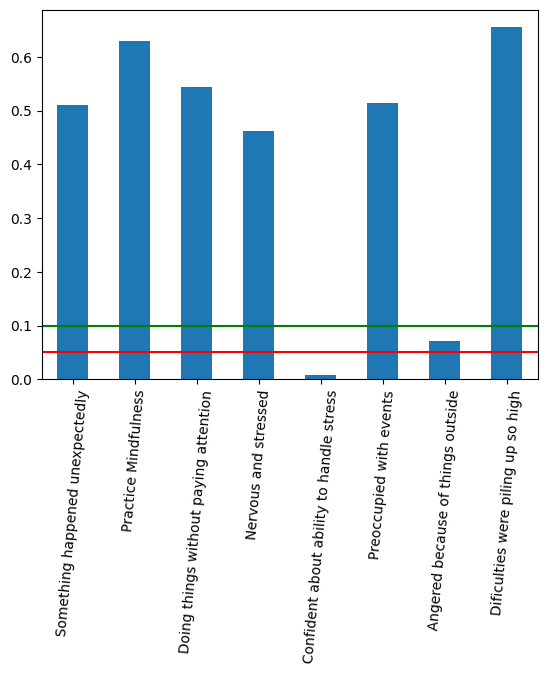

In [31]:
stat['p-value'].plot(kind='bar')
plt.axhline(y=.05, color='r', label='Horizontal Line at y=15')
plt.axhline(y=.1, color='g', label='Horizontal Line at y=15')
plt.xticks(rotation=85)
plt.show()


## Heatmap plot for significant pairs

From the plot above we can see 'Social Media' usage of Biochemistry students is associated with 'Doing things without paying attention' and 'Nervous and stressed'. Let's visualise the association with the help of heatmap plot. 

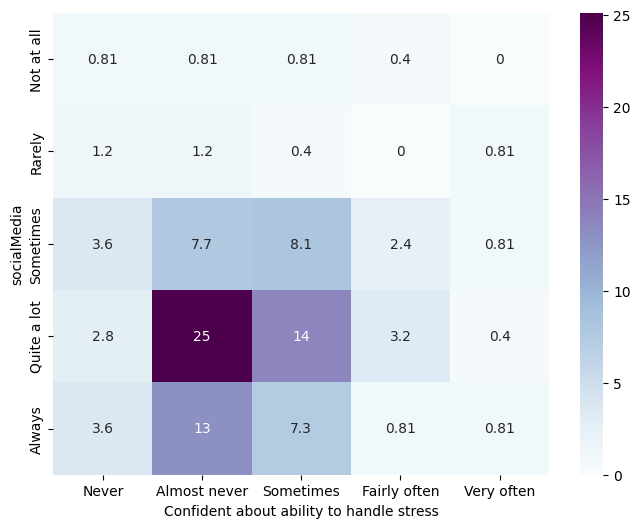

In [32]:
gen_heatmap(df_bio, 'socialMedia', 'confident_about_ability_to_handl')

# Cause of stress

In [33]:
c_names = ['Finance', 'Course workload', 'Personal Relationships', 'Moving to university', 'Social/Recreational', 'Health']

df_mr = df_med[df.columns[107:113]]
df_dummies = pd.get_dummies(df_mr, columns=df.columns[107:113])
df_dummies.columns = c_names
response_counts = df_dummies.sum()
percentage = response_counts/np.shape(df_med)[0] * 100
percentage.round(3)

Finance                   13.767
Course workload           51.740
Personal Relationships    37.519
Moving to university      25.567
Social/Recreational        6.808
Health                     5.144
dtype: float64

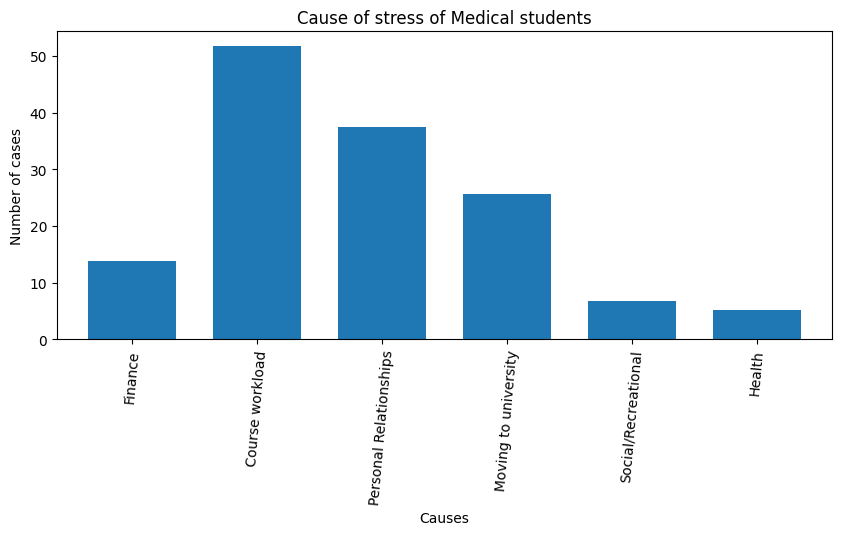

In [34]:
percentage.plot(kind='bar', figsize=(10, 4), width=.7)
plt.xticks(rotation=0)
plt.xlabel('Causes')
plt.ylabel('Number of cases')
plt.xticks(rotation=85)
plt.title('Cause of stress of Medical students')
plt.show()

In [35]:
c_names = ['Finance', 'Course workload', 'Personal Relationships', 'Moving to university', 'Social/Recreational', 'Health']

df_mr = df_bio[df.columns[107:113]]
df_dummies = pd.get_dummies(df_mr, columns=df.columns[107:113])
df_dummies.columns = c_names
response_counts = df_dummies.sum()
percentage = response_counts/np.shape(df_bio)[0] * 100
percentage.round(3)

Finance                   20.079
Course workload           40.945
Personal Relationships    33.071
Moving to university       5.512
Social/Recreational        4.724
Health                     7.087
dtype: float64

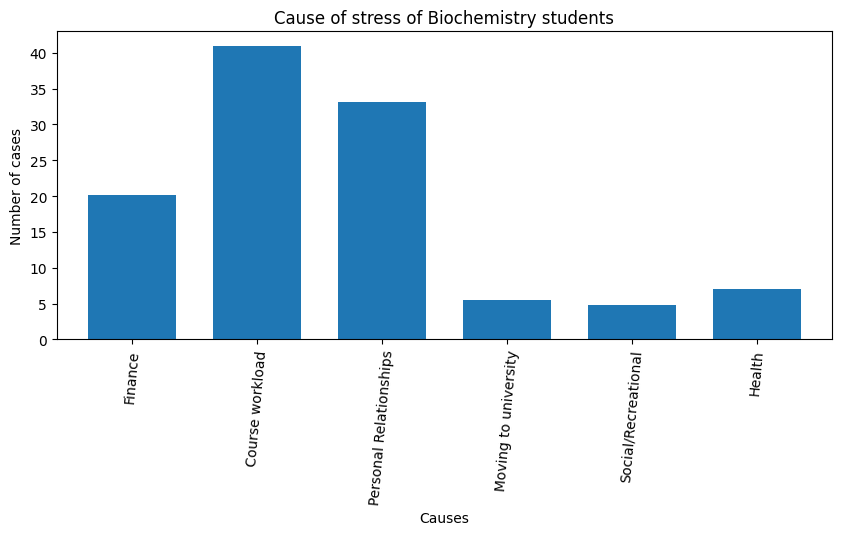

In [36]:
percentage.plot(kind='bar', figsize=(10, 4), width=.7)
plt.xticks(rotation=0)
plt.xlabel('Causes')
plt.ylabel('Number of cases')
plt.xticks(rotation=85)
plt.title('Cause of stress of Biochemistry students')
plt.show()

In conclusion we can say. Social media may not be a cause to reduce stress. Also Exercise can be a good factor of reducing stress. 

# Relationship between Exercise and Stress of Medical students

In [37]:
columns_to_analyze = [
    'something_happened_unexpectedly', 'practice_Mindfulness',
    'doing_things_without_paying_atte', 'nervous_and_stressed',
    'confident_about_ability_to_handl', 'preoccupied_with_events',
    'angered_because_of_things_outsid', 'dificulties_were_piling_up_so_hi'
]
c_names = ['Something happened unexpectedly', 'Practice Mindfulness',
       'Doing things without paying attention', 'Nervous and stressed',
       'Confident about ability to handle stress', 'Preoccupied with events',
       'Angered because of things outside', 'Dificulties were piling up so high']
stat = {'ChiSQ': [], "p-value": []}

for column in columns_to_analyze:
    contingency_table = pd.crosstab(df_med['exercise'], df_med[column])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)

    stat['ChiSQ'].append(chi2)
    stat['p-value'].append(p)
  

stat = pd.DataFrame(stat, index=c_names)
stat['alpha=5%'] = stat['p-value']<0.05
stat['alpha=10%'] = stat['p-value']<0.1

stat

,ChiSQ,p-value,alpha=5%,alpha=10%
Something happened unexpectedly,25.229857,0.065874,False,True
Practice Mindfulness,23.191835,0.108702,False,False
Doing things without paying attention,9.877051,0.872970,False,False
Nervous and stressed,23.572497,0.099266,False,True
Confident about ability to handle stress,27.135178,0.040005,True,True
Preoccupied with events,14.923523,0.530247,False,False
Angered because of things outside,23.347316,0.104761,False,False
Dificulties were piling up so high,25.538748,0.060874,False,True


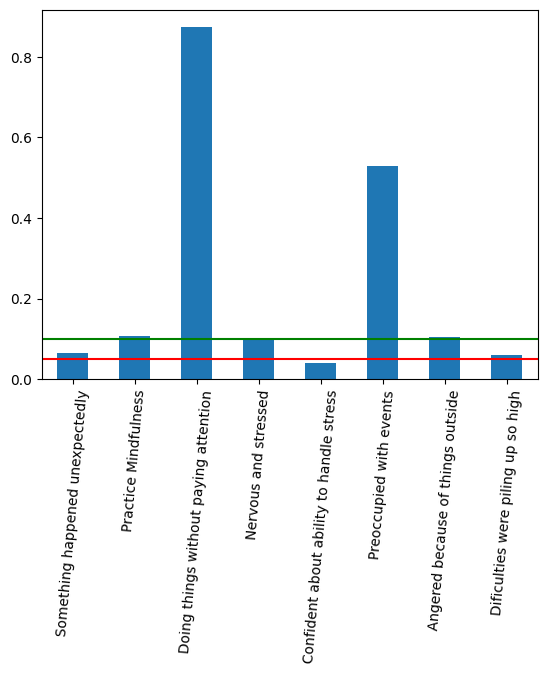

In [38]:
stat['p-value'].plot(kind='bar')
plt.axhline(y=.05, color='r', label='Horizontal Line at y=15')
plt.axhline(y=.1, color='g', label='Horizontal Line at y=15')
plt.xticks(rotation=85)
plt.show()


For 10% tollarence 'Exercise' is associated with 'Something happened unexpectedly', 'Nervous and stressed', 'Confident about ability to handle stress' and 'Dificulties were piling up so high' Let's have a look on heatmap.

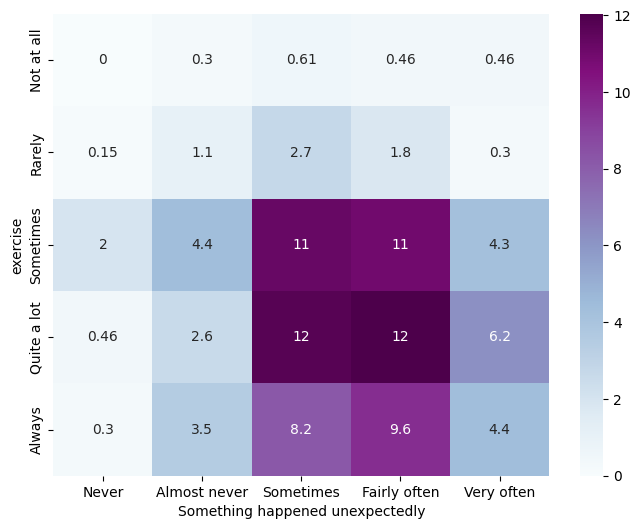

In [39]:
gen_heatmap(df_med, 'exercise', 'something_happened_unexpectedly')

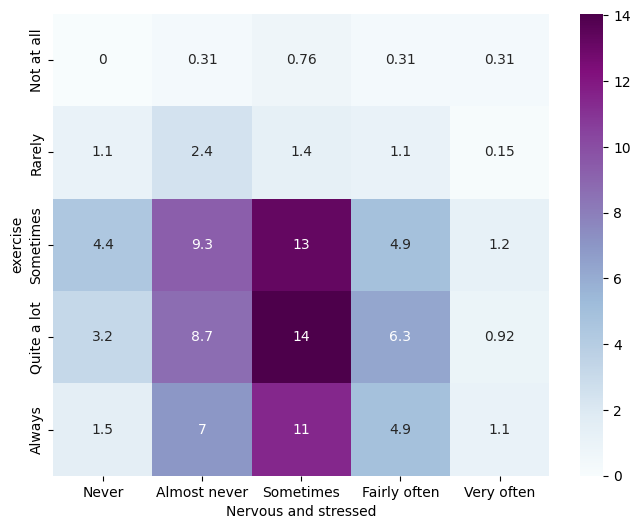

In [40]:
gen_heatmap(df_med, 'exercise', 'nervous_and_stressed')

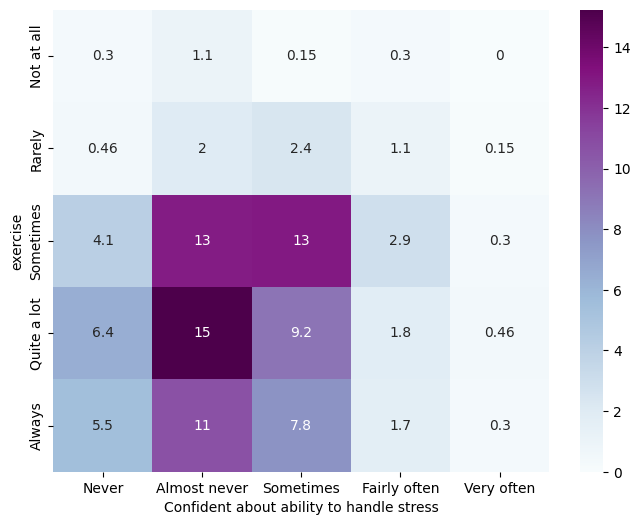

In [41]:
gen_heatmap(df_med, 'exercise', 'confident_about_ability_to_handl')

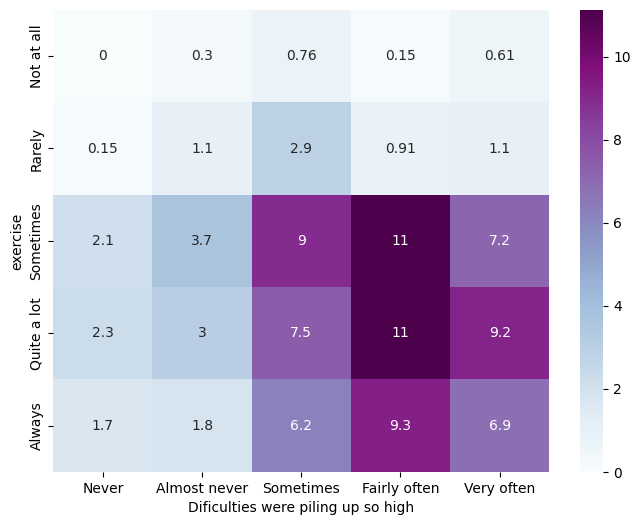

In [42]:
gen_heatmap(df_med, 'exercise', 'dificulties_were_piling_up_so_hi')

# Relationship between Exercise and Stress of Biochemistry students

In [43]:
stat = {'ChiSQ': [], "p-value": []}

for column in columns_to_analyze:
    contingency_table = pd.crosstab(df_bio['exercise'], df_bio[column])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)

    stat['ChiSQ'].append(chi2)
    stat['p-value'].append(p)
  

stat = pd.DataFrame(stat, index=c_names)
stat['alpha=5%'] = stat['p-value']<0.05
stat['alpha=10%'] = stat['p-value']<0.1

stat

,ChiSQ,p-value,alpha=5%,alpha=10%
Something happened unexpectedly,30.113206,0.017424,True,True
Practice Mindfulness,20.348091,0.204950,False,False
Doing things without paying attention,9.614803,0.885955,False,False
Nervous and stressed,19.575826,0.239936,False,False
Confident about ability to handle stress,32.058208,0.009827,True,True
Preoccupied with events,14.690695,0.547398,False,False
Angered because of things outside,14.878598,0.533548,False,False
Dificulties were piling up so high,29.393143,0.021416,True,True


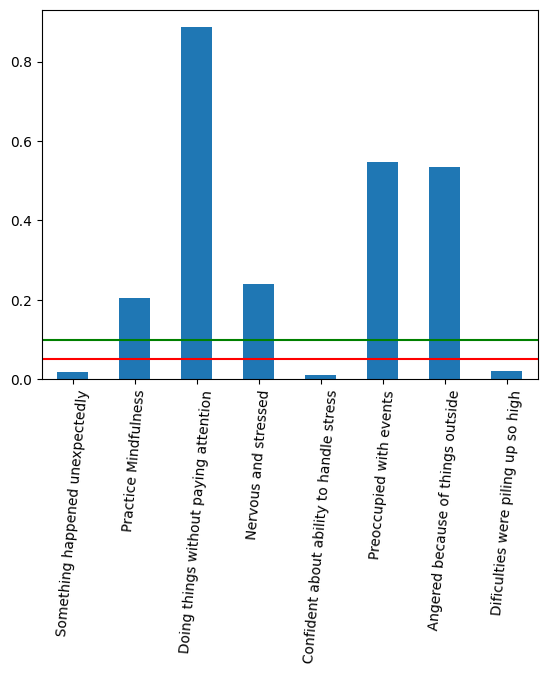

In [44]:
stat['p-value'].plot(kind='bar')
plt.axhline(y=.05, color='r', label='Horizontal Line at y=15')
plt.axhline(y=.1, color='g', label='Horizontal Line at y=15')
plt.xticks(rotation=85)
plt.show()


For 5% tolerance  'Exercise' is associated with 'Something happened unexpectedly', 'Confident about ability to handle stress' and ''Difficulties  were piling up so high' Let's have a look on heatmap.

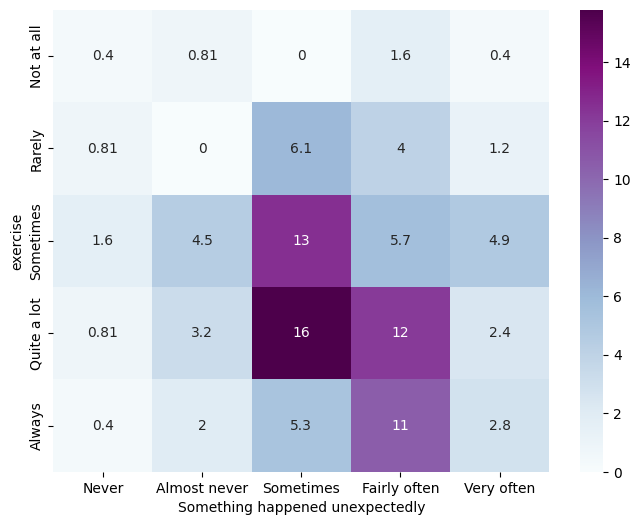

In [45]:
gen_heatmap(df_bio, 'exercise', 'something_happened_unexpectedly')

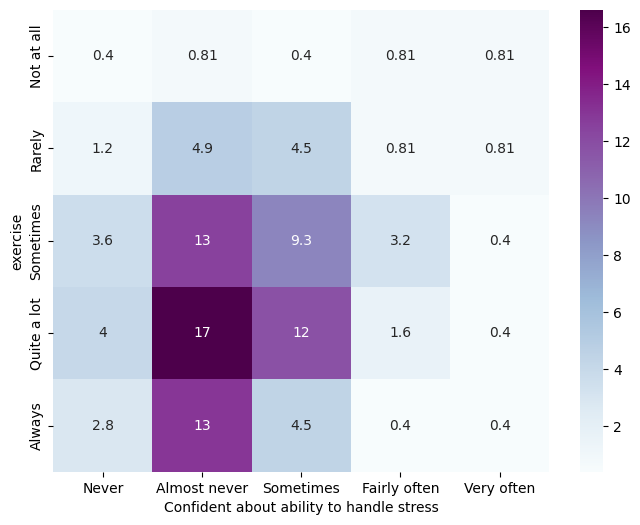

In [46]:
gen_heatmap(df_bio, 'exercise', 'confident_about_ability_to_handl')

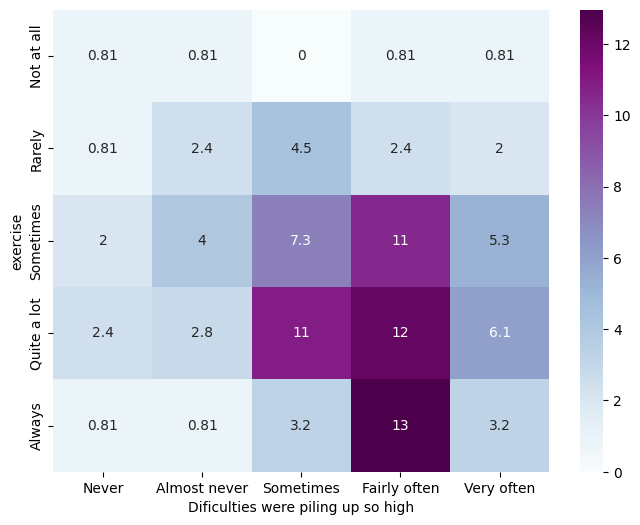

In [47]:
gen_heatmap(df_bio, 'exercise', 'dificulties_were_piling_up_so_hi')